Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
13.11111111111111


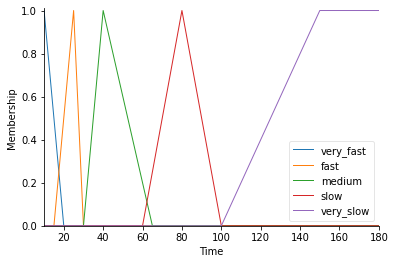

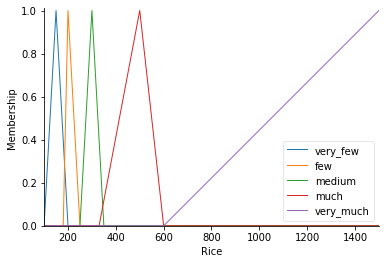

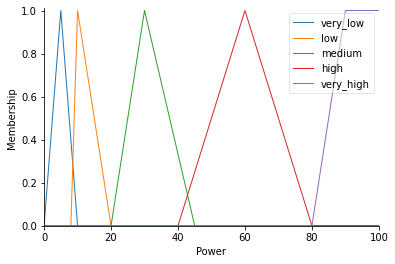

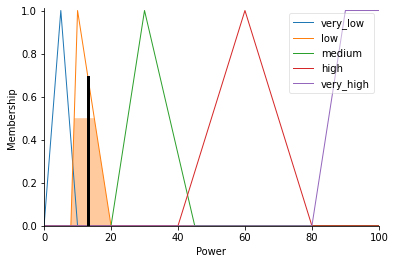

In [5]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Time = ctrl.Antecedent(np.arange(10,181,1),'Time')
Rice = ctrl.Antecedent(np.arange(100,1501,1),'Rice')
Power = ctrl.Consequent(np.arange(0,101,1),'Power')

Time['very_fast'] = fuzz.trimf(Time.universe,[10,10,20])
Time['fast'] = fuzz.trimf(Time.universe,[15,25,30])
Time['medium'] = fuzz.trimf(Time.universe,[30,40,65])
Time['slow'] = fuzz.trimf(Time.universe,[60,80,100])
Time['very_slow'] = fuzz.trapmf(Time.universe,[100,150,180,180])

Rice['very_few'] = fuzz.trimf(Rice.universe,[100,150,200])
Rice['few'] = fuzz.trimf(Rice.universe,[180,200,250])
Rice['medium'] = fuzz.trimf(Rice.universe,[250,300,350])
Rice['much'] = fuzz.trimf(Rice.universe,[330,500,600])
Rice['very_much'] = fuzz.trimf(Rice.universe,[600,1500,1500])

Power['very_low'] = fuzz.trimf(Power.universe,[0,5,10])
Power['low'] = fuzz.trimf(Power.universe,[8,10,20])
Power['medium'] = fuzz.trimf(Power.universe,[20,30,45])
Power['high'] = fuzz.trimf(Power.universe,[40,60,80])
Power['very_high'] = fuzz.trapmf(Power.universe,[80,90,100,100])


rule1 = ctrl.Rule(Time['very_fast'] & Rice['very_few'],Power['very_low'])
rule2 = ctrl.Rule(Time['very_fast'] & Rice['few'],Power['very_low'])
rule3 = ctrl.Rule(Time['very_fast'] & Rice['medium'],Power['low'])
rule4 = ctrl.Rule(Time['very_fast'] & Rice['much'],Power['medium'])
rule5 = ctrl.Rule(Time['very_fast'] & Rice['very_much'],Power['high'])

rule6 = ctrl.Rule(Time['fast'] & Rice['very_few'],Power['very_low'])
rule7 = ctrl.Rule(Time['fast'] & Rice['few'],Power['low'])
rule8 = ctrl.Rule(Time['fast'] & Rice['medium'],Power['low'])
rule9 = ctrl.Rule(Time['fast'] & Rice['much'],Power['medium'])
rule10 = ctrl.Rule(Time['fast'] & Rice['very_much'],Power['high'])

rule11 = ctrl.Rule(Time['medium'] & Rice['very_few'],Power['low'])
rule12 = ctrl.Rule(Time['medium'] & Rice['few'],Power['low'])
rule13 = ctrl.Rule(Time['medium'] & Rice['medium'],Power['medium'])
rule14 = ctrl.Rule(Time['medium'] & Rice['much'],Power['high'])
rule15 = ctrl.Rule(Time['medium'] & Rice['very_much'],Power['very_high'])

rule16 = ctrl.Rule(Time['slow'] & Rice['very_few'],Power['medium'])
rule17 = ctrl.Rule(Time['slow'] & Rice['few'],Power['medium'])
rule18 = ctrl.Rule(Time['slow'] & Rice['medium'],Power['high'])
rule19 = ctrl.Rule(Time['slow'] & Rice['much'],Power['high'])
rule20 = ctrl.Rule(Time['slow'] & Rice['very_much'],Power['very_high'])

rule21 = ctrl.Rule(Time['very_slow'] & Rice['very_few'],Power['high'])
rule22 = ctrl.Rule(Time['very_slow'] & Rice['few'],Power['high'])
rule23 = ctrl.Rule(Time['very_slow'] & Rice['medium'],Power['very_high'])
rule24 = ctrl.Rule(Time['very_slow'] & Rice['much'],Power['very_high'])
rule25 = ctrl.Rule(Time['very_slow'] & Rice['very_much'],Power['very_high'])

Time.view()
Rice.view()
Power.view()

Power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(Power_ctrl)

powering.input['Rice'] = 200
powering.input['Time'] = 20

powering.compute()
print(powering.output['Power'])
Power.view(sim = powering)
